In [1]:
 #  Importing Necessary Libraraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error ,r2_score

In [2]:
#Importing the Data
df=pd.read_csv("Indian House Prices.csv")

In [3]:
df

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.265594,76.646540
1,1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.971319,77.696477
2,2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.917657,77.483757
3,3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.027331,77.660151
4,4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.054713,77.633926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,24599,620.00,1450,Worli,3.0,0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.011696,72.818070
9386,24600,25.00,540,Virar East,1.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.457969,72.814214
9387,24601,190.00,1267,Belapur,3.0,1,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,29.363160,80.723436
9388,24602,149.00,1245,Airoli,2.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,29.656246,79.432182


### Lets Analyze the Dataset First

In [4]:
df.head()


,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.265594,76.646540
1,1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.971319,77.696477
2,2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.917657,77.483757
3,3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.027331,77.660151
4,4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.054713,77.633926


In [5]:
df.tail()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
9385,24599,620.0,1450,Worli,3.0,0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.011696,72.818070
9386,24600,25.0,540,Virar East,1.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.457969,72.814214
9387,24601,190.0,1267,Belapur,3.0,1,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,29.363160,80.723436
9388,24602,149.0,1245,Airoli,2.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,29.656246,79.432182
9389,24603,140.0,1183,Airoli,2.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,29.656246,79.432182


In [6]:
df.shape

(9390, 44)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           9390 non-null   int64  
 1   Price                9390 non-null   float64
 2   Area                 9390 non-null   int64  
 3   Location             9390 non-null   object 
 4   No. of Bedrooms      9390 non-null   float64
 5   Resale               9390 non-null   int64  
 6   MaintenanceStaff     9390 non-null   float64
 7   Gymnasium            9390 non-null   float64
 8   SwimmingPool         9390 non-null   float64
 9   LandscapedGardens    9390 non-null   float64
 10  JoggingTrack         9390 non-null   float64
 11  RainWaterHarvesting  9390 non-null   float64
 12  IndoorGames          9390 non-null   float64
 13  ShoppingMall         9390 non-null   float64
 14  Intercom             9390 non-null   float64
 15  SportsFacility       9390 non-null   f

In [8]:
df.describe()

,Unnamed: 0,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude
count,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,...,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000
mean,11149.285091,105.614563,1354.274973,2.472311,0.352183,0.171778,0.509904,0.405644,0.342279,0.320554,...,0.296166,0.049414,0.022258,0.056550,0.053248,0.051544,0.021832,0.051864,18.778749,74.315855
std,7292.839800,139.664066,719.154146,0.762603,0.477676,0.377208,0.499929,0.491042,0.474498,0.466714,...,0.456589,0.216743,0.147528,0.230992,0.224540,0.221117,0.146142,0.221764,7.554944,18.613870
min,0.000000,20.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.816624,-117.147666
25%,5957.250000,45.000000,924.250000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.980165,77.036315
50%,10828.500000,70.000000,1200.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.451210,77.746994
75%,16088.750000,122.000000,1610.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.227342,79.922469
max,24603.000000,4000.000000,9900.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.447377,127.655678


In [9]:
df["City"].value_counts().sort_values()

City
Kolkata        68
Mumbai       1302
Banglore     1708
Delhi        1989
Chennai      2047
Hyderabad    2276
Name: count, dtype: int64

### Now lets clean our Data

In [10]:
df.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'City', 'Latitude',
       'Longitude'],
      dtype='object')

In [11]:
len(df.columns)

44

#### -Remove not usefull columns

In [12]:
DF = df[['City', 'Location', 'Area','Gasconnection','PowerBackup', 'No. of Bedrooms', 'CarParking','School', 'AC','Hospital', 'Wifi', 'LiftAvailable', '24X7Security', 'Price']]
DF.head()

,City,Location,Area,Gasconnection,PowerBackup,No. of Bedrooms,CarParking,School,AC,Hospital,Wifi,LiftAvailable,24X7Security,Price
0,Banglore,JP Nagar Phase 1,3340,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,300.00
1,Banglore,Doddanekundi,1675,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,83.58
2,Banglore,Kengeri,1670,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,68.45
3,Banglore,Horamavu,1220,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,67.97
4,Banglore,Thanisandra,2502,0.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,200.00


In [13]:
DF.columns

Index(['City', 'Location', 'Area', 'Gasconnection', 'PowerBackup',
       'No. of Bedrooms', 'CarParking', 'School', 'AC', 'Hospital', 'Wifi',
       'LiftAvailable', '24X7Security', 'Price'],
      dtype='object')

In [14]:
len(DF.columns)

14

#### -Columns reduces from 44 to 10
###
### Rename some Columns

In [15]:
DF.rename(columns={'Area':'total_sqft', 'Location':'Area', 'No. of Bedrooms':'BHK', 'CarParking':'Parking', 'LiftAvailable':'Lift', '24X7Security':'Security'}, inplace=True)
DF.head()

,City,Area,total_sqft,Gasconnection,PowerBackup,BHK,Parking,School,AC,Hospital,Wifi,Lift,Security,Price
0,Banglore,JP Nagar Phase 1,3340,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,300.00
1,Banglore,Doddanekundi,1675,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,83.58
2,Banglore,Kengeri,1670,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,68.45
3,Banglore,Horamavu,1220,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,67.97
4,Banglore,Thanisandra,2502,0.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,200.00


### Adding an extra column for price per square feet.

In [16]:
DF['Price_per_sqft'] = (DF['Price']*100000/DF['total_sqft']).round()
DF

,City,Area,total_sqft,Gasconnection,PowerBackup,BHK,Parking,School,AC,Hospital,Wifi,Lift,Security,Price,Price_per_sqft
0,Banglore,JP Nagar Phase 1,3340,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,300.00,8982.0
1,Banglore,Doddanekundi,1675,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,83.58,4990.0
2,Banglore,Kengeri,1670,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,68.45,4099.0
3,Banglore,Horamavu,1220,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,67.97,5571.0
4,Banglore,Thanisandra,2502,0.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,200.00,7994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,Mumbai,Worli,1450,1.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,620.00,42759.0
9386,Mumbai,Virar East,540,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.00,4630.0
9387,Mumbai,Belapur,1267,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,190.00,14996.0
9388,Mumbai,Airoli,1245,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,149.00,11968.0


In [17]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            9390 non-null   object 
 1   Area            9390 non-null   object 
 2   total_sqft      9390 non-null   int64  
 3   Gasconnection   9390 non-null   float64
 4   PowerBackup     9390 non-null   float64
 5   BHK             9390 non-null   float64
 6   Parking         9390 non-null   float64
 7   School          9390 non-null   float64
 8   AC              9390 non-null   float64
 9   Hospital        9390 non-null   float64
 10  Wifi            9390 non-null   float64
 11  Lift            9390 non-null   float64
 12  Security        9390 non-null   float64
 13  Price           9390 non-null   float64
 14  Price_per_sqft  9390 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 1.1+ MB


In [18]:
DF["School"].value_counts()

School
0.0    8729
1.0     661
Name: count, dtype: int64

In [19]:
DF["Hospital"].value_counts()

Hospital
0.0    8880
1.0     510
Name: count, dtype: int64

In [20]:
DF["Gasconnection"].value_counts()

Gasconnection
0.0    7713
1.0    1677
Name: count, dtype: int64

In [21]:
DF["City"].value_counts()

City
Hyderabad    2276
Chennai      2047
Delhi        1989
Banglore     1708
Mumbai       1302
Kolkata        68
Name: count, dtype: int64

In [22]:
#Checking Null Values
DF.isnull().sum()

City              0
Area              0
total_sqft        0
Gasconnection     0
PowerBackup       0
BHK               0
Parking           0
School            0
AC                0
Hospital          0
Wifi              0
Lift              0
Security          0
Price             0
Price_per_sqft    0
dtype: int64

In [23]:
DF["Area"]

0       JP Nagar Phase 1
1           Doddanekundi
2                Kengeri
3               Horamavu
4            Thanisandra
              ...       
9385               Worli
9386          Virar East
9387             Belapur
9388              Airoli
9389              Airoli
Name: Area, Length: 9390, dtype: object

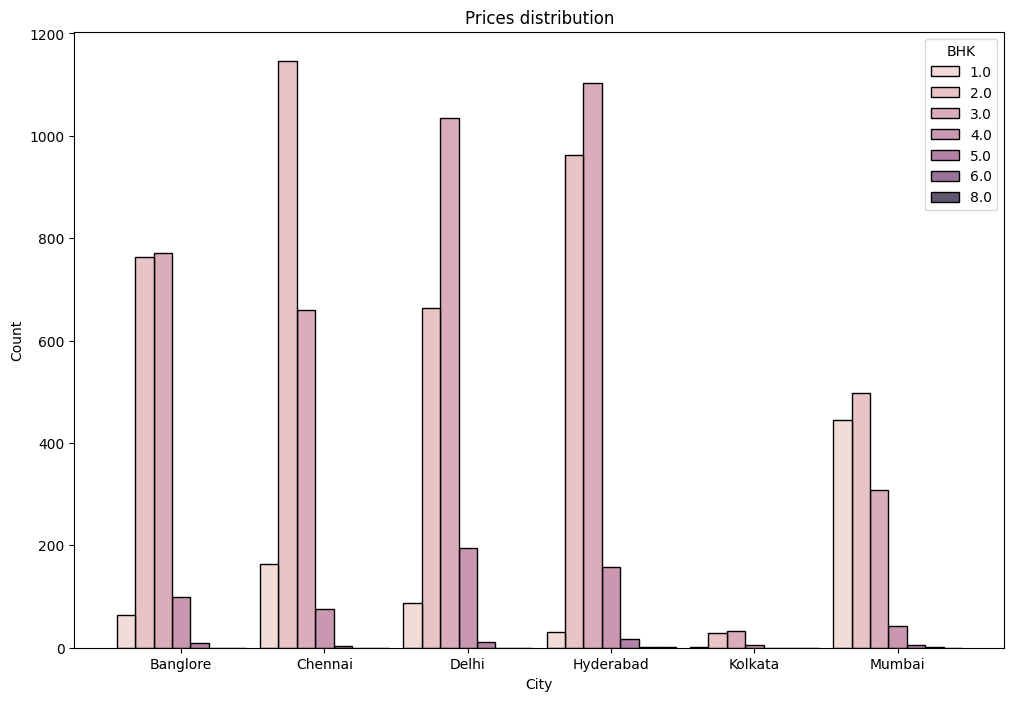

In [24]:
plt.figure(figsize=(12, 8))
sns.histplot(data=DF, x='City', hue='BHK', multiple='dodge', shrink=.9)
plt.title('Prices distribution')
plt.show()

In [25]:
DF.sort_values(by=['Price'], ascending=False).head(20)

,City,Area,total_sqft,Gasconnection,PowerBackup,BHK,Parking,School,AC,Hospital,Wifi,Lift,Security,Price,Price_per_sqft
8992,Mumbai,Worli,3638,0.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,4000.0,109951.0
8941,Mumbai,Lower Parel,5476,1.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3600.0,65741.0
8926,Mumbai,Lower Parel,5476,1.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3600.0,65741.0
8960,Mumbai,Lower Parel,5476,1.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3600.0,65741.0
766,Banglore,Hebbal,9900,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2027.0,20475.0
9306,Mumbai,Tardeo,3000,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2000.0,66667.0
764,Banglore,Hebbal,9700,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1986.0,20474.0
2982,Chennai,Nungambakkam,7240,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1900.0,26243.0
753,Banglore,Hebbal,8902,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1823.0,20479.0
8906,Mumbai,juhu tara,2200,1.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1800.0,81818.0


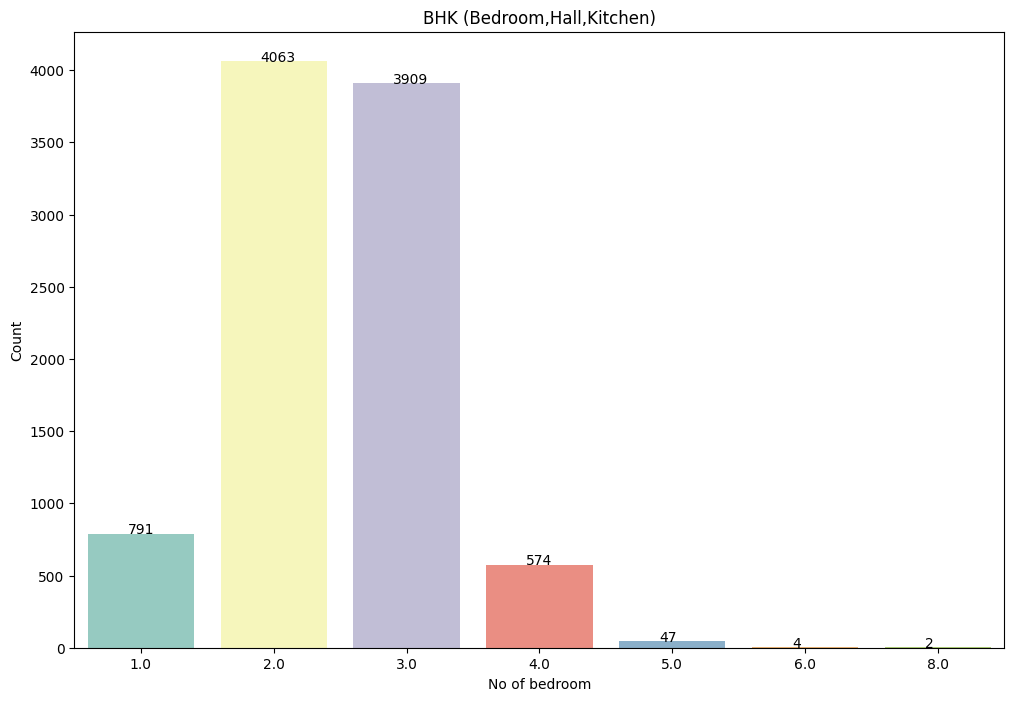

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(x='BHK', data=DF, palette="Set3")
# Add labels and title
plt.xlabel("No of bedroom")
plt.ylabel("Count")
plt.title("BHK (Bedroom,Hall,Kitchen)")
#Show plot
for p in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.01))
plt.show()




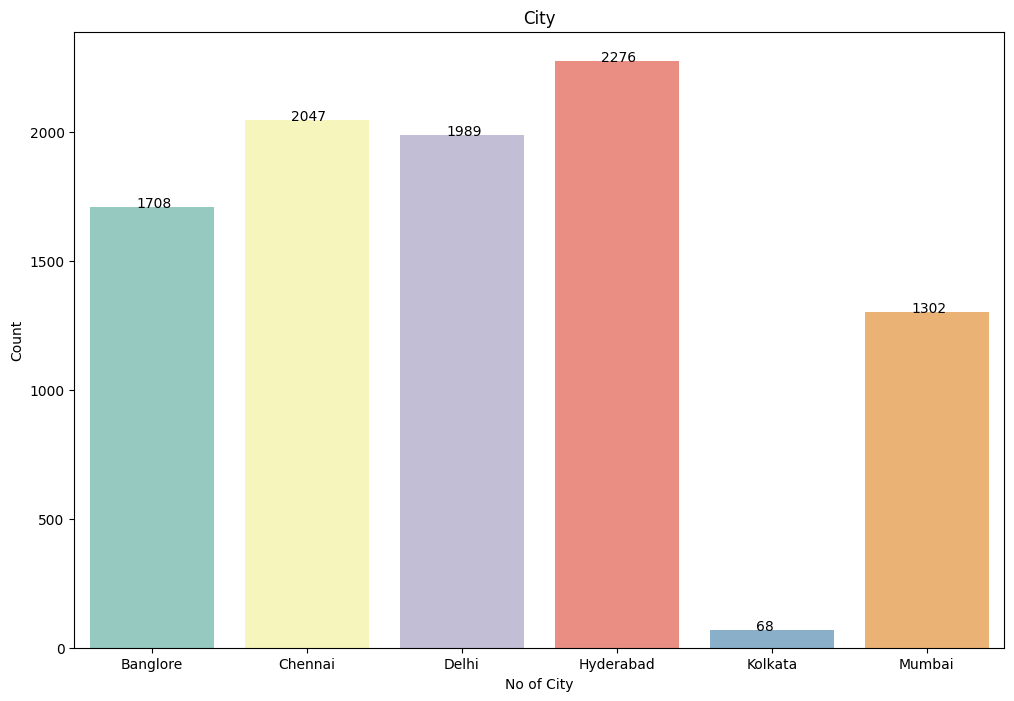

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x='City', data=DF, palette="Set3")
# Add labels and title
plt.xlabel("No of City")
plt.ylabel("Count")
plt.title("City")
#Show plot
for p in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.01))
plt.show()

Text(0.5, 1.0, 'Comparision of the prices for different floors')

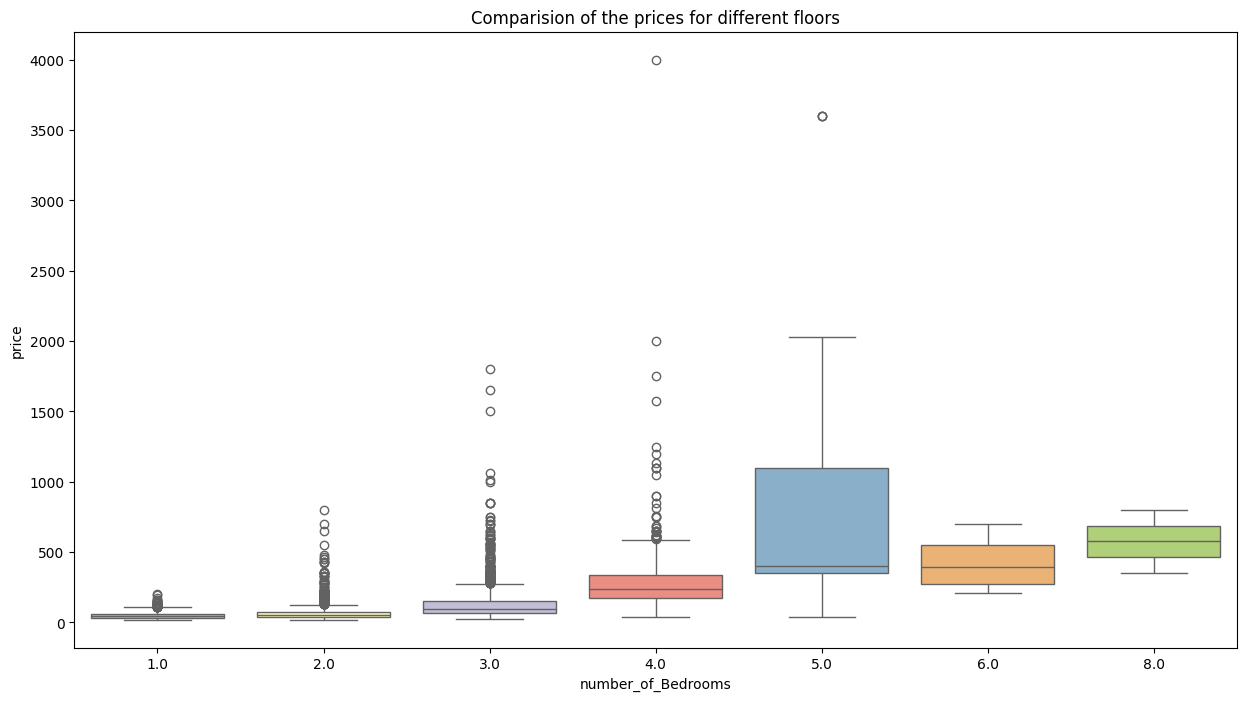

In [28]:
# Comparision of the prices for Floor in house
plt.figure(figsize=(15,8))
sns.boxplot(x="BHK",y="Price",data=DF,palette="Set3")
plt.xlabel("number_of_Bedrooms")
plt.ylabel("price")
plt.title("Comparision of the prices for different floors")

In [29]:
numerical_columns = DF.select_dtypes(include=['number']).columns.tolist()

# Print the numerical columns
print(numerical_columns)

corr = DF[numerical_columns].corr()
corr

['total_sqft', 'Gasconnection', 'PowerBackup', 'BHK', 'Parking', 'School', 'AC', 'Hospital', 'Wifi', 'Lift', 'Security', 'Price', 'Price_per_sqft']


,total_sqft,Gasconnection,PowerBackup,BHK,Parking,School,AC,Hospital,Wifi,Lift,Security,Price,Price_per_sqft
total_sqft,1.000000,0.168467,0.246137,0.727874,0.147105,0.015670,0.159493,0.012886,0.007096,0.120442,0.187021,0.657287,0.223288
Gasconnection,0.168467,1.000000,0.153473,0.157129,-0.026430,0.012988,0.405590,0.029343,0.157816,0.119613,-0.041496,0.178626,0.204652
PowerBackup,0.246137,0.153473,1.000000,0.073632,0.443611,0.162126,0.120447,0.141902,0.088716,0.491156,0.528135,0.159062,0.128691
BHK,0.727874,0.157129,0.073632,1.000000,0.016462,-0.018670,0.106695,-0.022109,-0.029682,0.098430,0.014806,0.440034,0.145123
Parking,0.147105,-0.026430,0.443611,0.016462,1.000000,0.258361,0.040210,0.229879,0.142861,0.319093,0.690168,0.146754,0.185846
School,0.015670,0.012988,0.162126,-0.018670,0.258361,1.000000,-0.008687,0.824961,0.089239,0.142121,0.289760,0.023105,0.044658
AC,0.159493,0.405590,0.120447,0.106695,0.040210,-0.008687,1.000000,-0.008620,0.063654,0.071537,0.062242,0.168987,0.180347
Hospital,0.012886,0.029343,0.141902,-0.022109,0.229879,0.824961,-0.008620,1.000000,0.120941,0.124492,0.255376,0.043511,0.084085
Wifi,0.007096,0.157816,0.088716,-0.029682,0.142861,0.089239,0.063654,0.120941,1.000000,0.070377,0.142164,0.055114,0.118916
Lift,0.120442,0.119613,0.491156,0.098430,0.319093,0.142121,0.071537,0.124492,0.070377,1.000000,0.307960,0.070401,0.056869


In [30]:
def treat_outliers(df, column_name):
    # Step 1: Calculate quartiles and IQR
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1

    # Step 2: Calculate lower and upper fences
    lf = q1 - 1.5 * IQR
    uf = q3 + 1.5 * IQR

    # Step 3: Replace outliers
    df[column_name] = np.where(df[column_name] > uf, uf, df[column_name])
    df[column_name] = np.where(df[column_name] < lf, lf, df[column_name])

    # Step 4: Boxplot after outlier treatment
    plt.boxplot(df[column_name])
    plt.title(f'Boxplot of {column_name}')
    plt.show()


In [31]:
 #City', 'Location', 'Area', 'Gasconnection', 'PowerBackup',
#        'No. of Bedrooms', 'CarParking', 'School', 'AC', 'Hospital', 'Wifi',
#        'LiftAvailable', '24X7Security', 'Price']

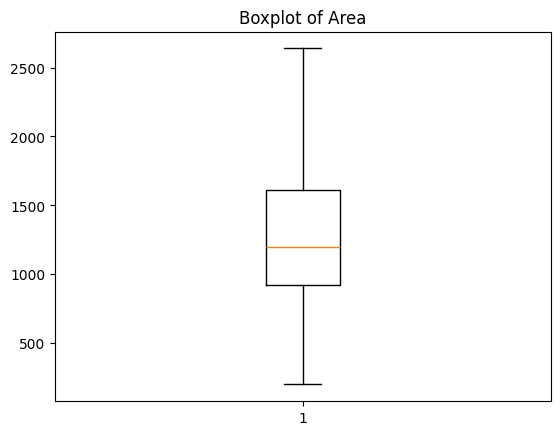

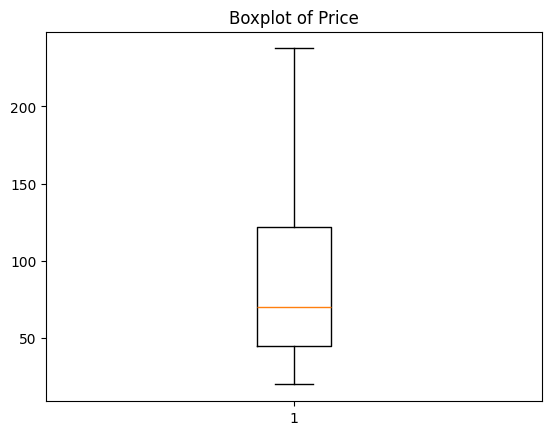

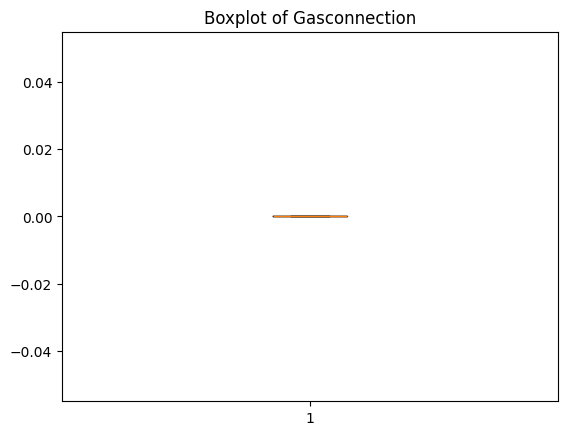

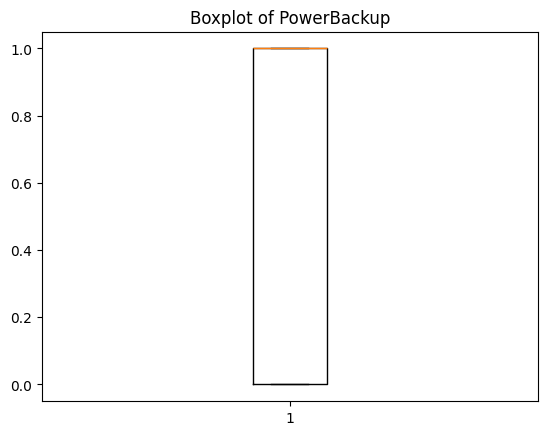

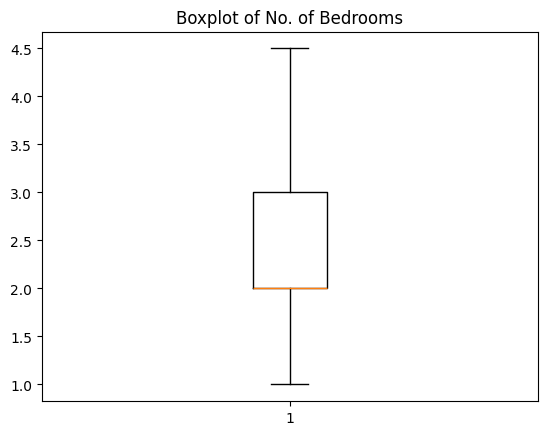

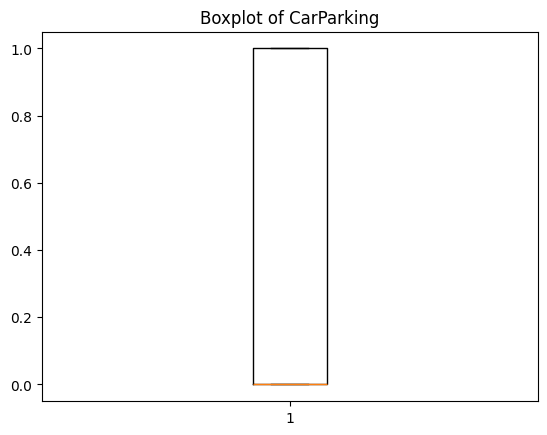

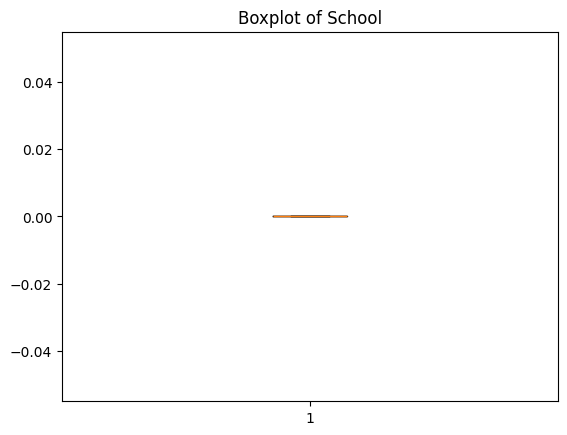

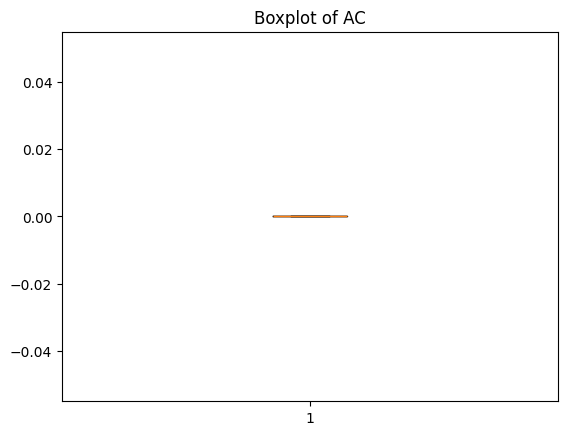

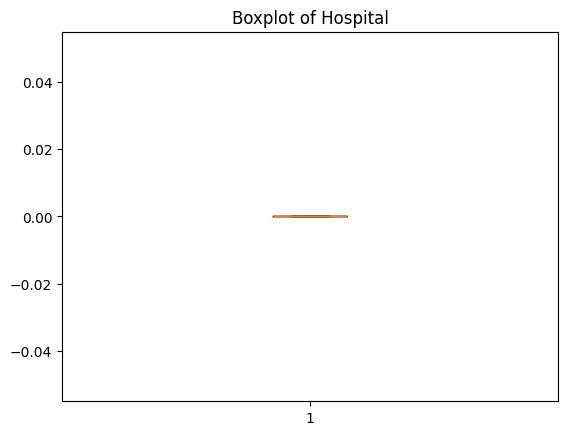

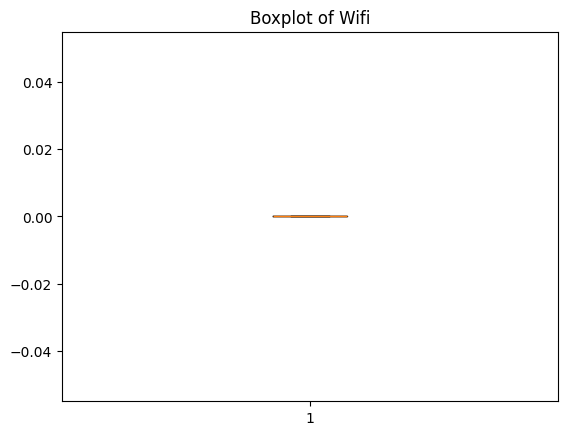

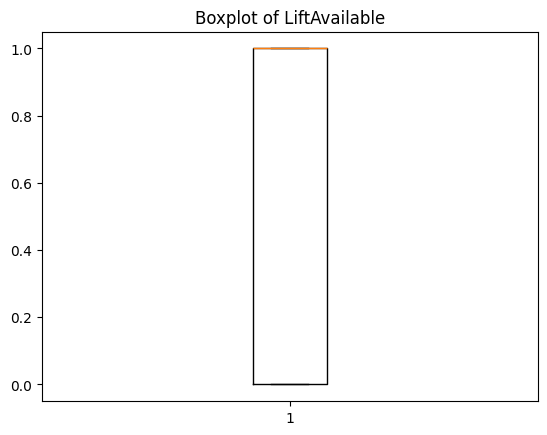

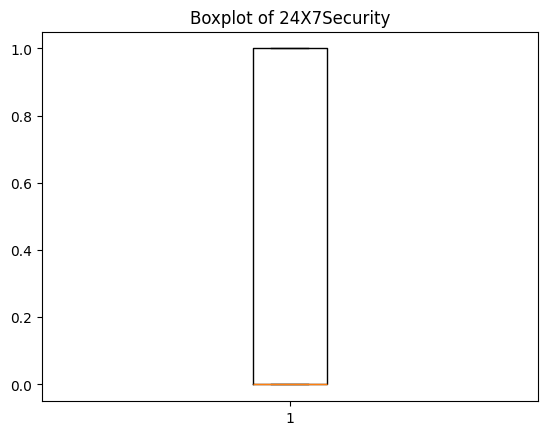

In [32]:
# treat_outliers(df, "Location")
treat_outliers(df, "Area")
treat_outliers(df, "Price")
treat_outliers(df, "Gasconnection")
treat_outliers(df, "PowerBackup")
treat_outliers(df, "No. of Bedrooms")
treat_outliers(df, "CarParking")
treat_outliers(df, "School")
treat_outliers(df, "AC")
treat_outliers(df, "Hospital")
treat_outliers(df, "Wifi")
treat_outliers(df, "LiftAvailable")
treat_outliers(df, "24X7Security")

<Axes: >

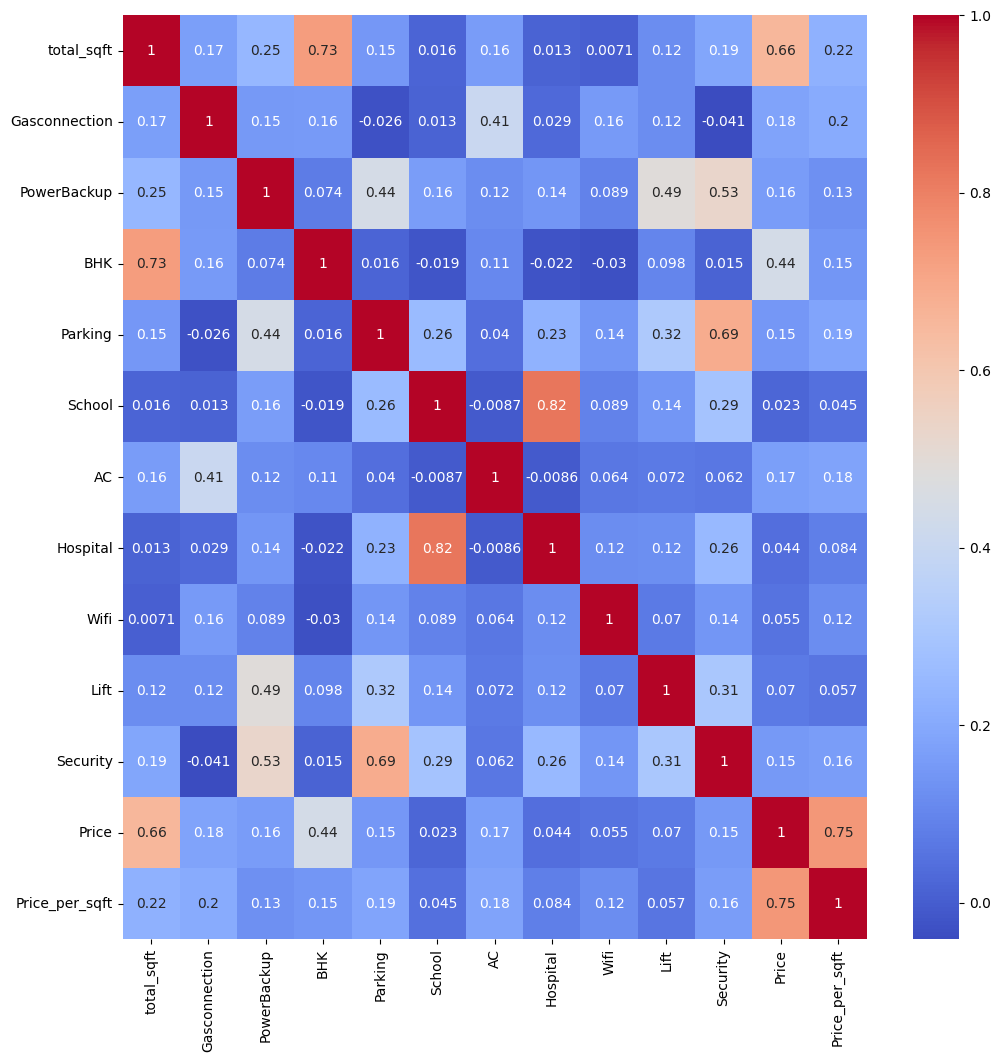

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Description of cities with price Range

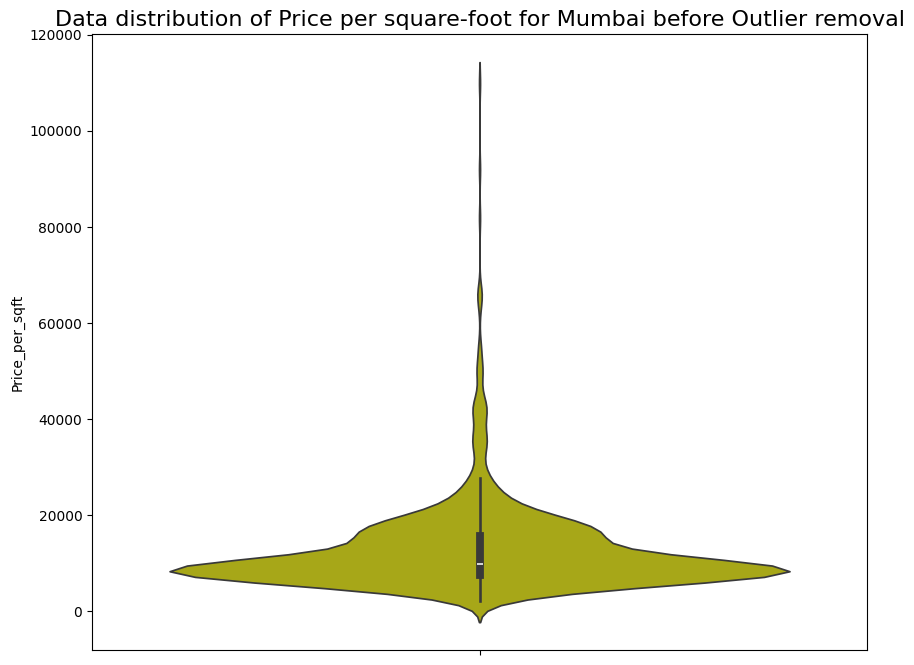

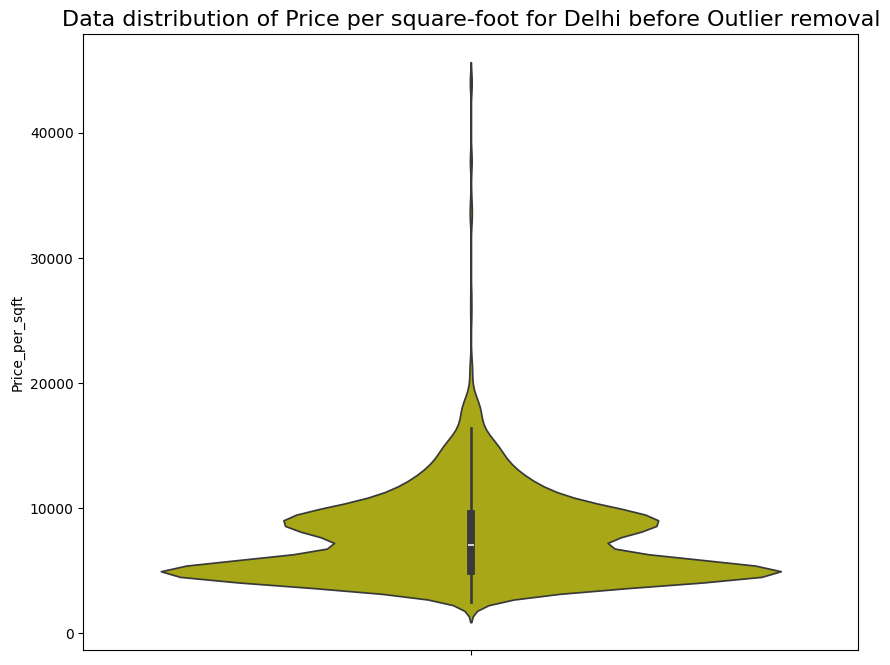

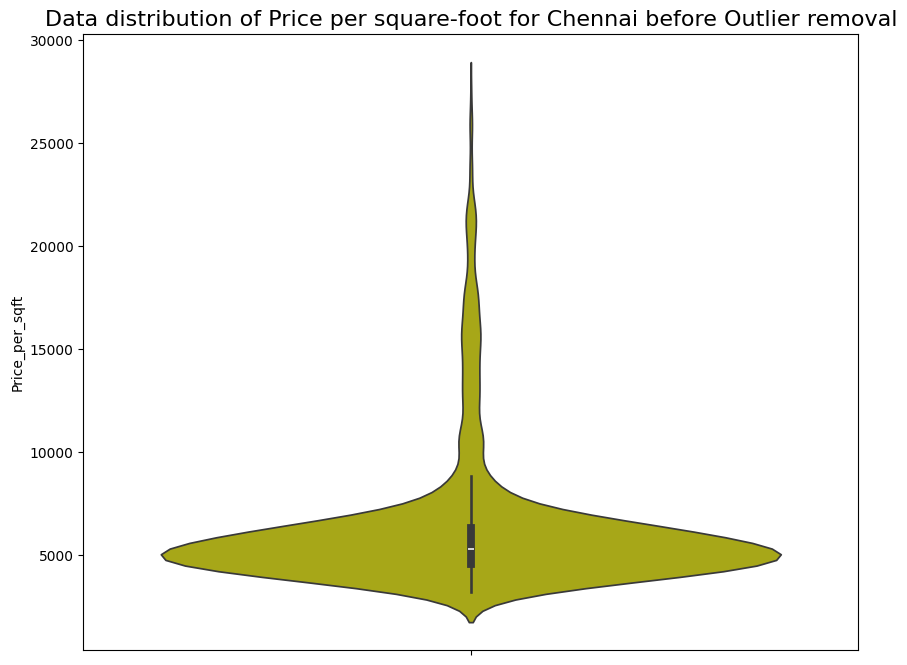

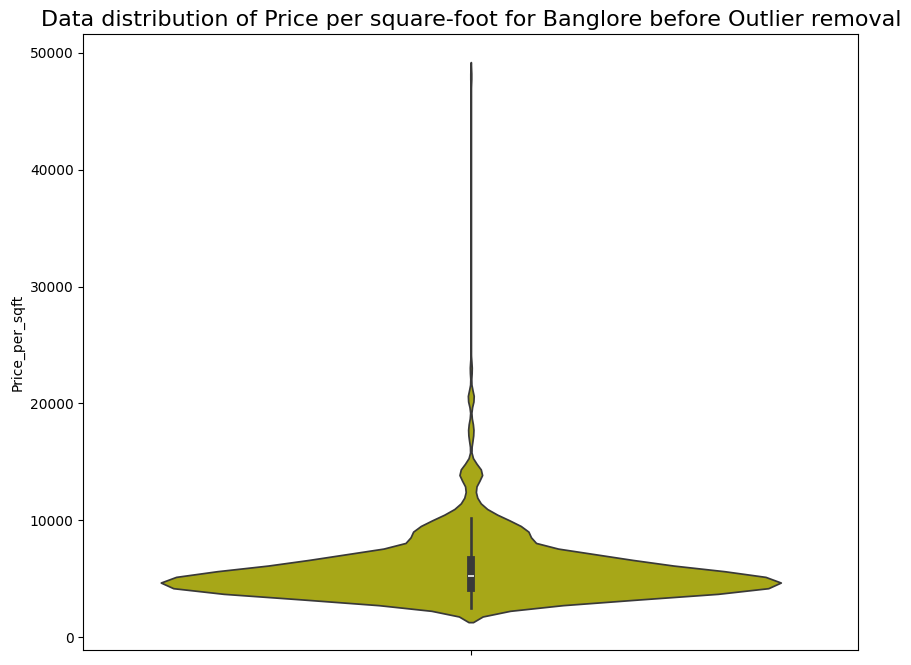

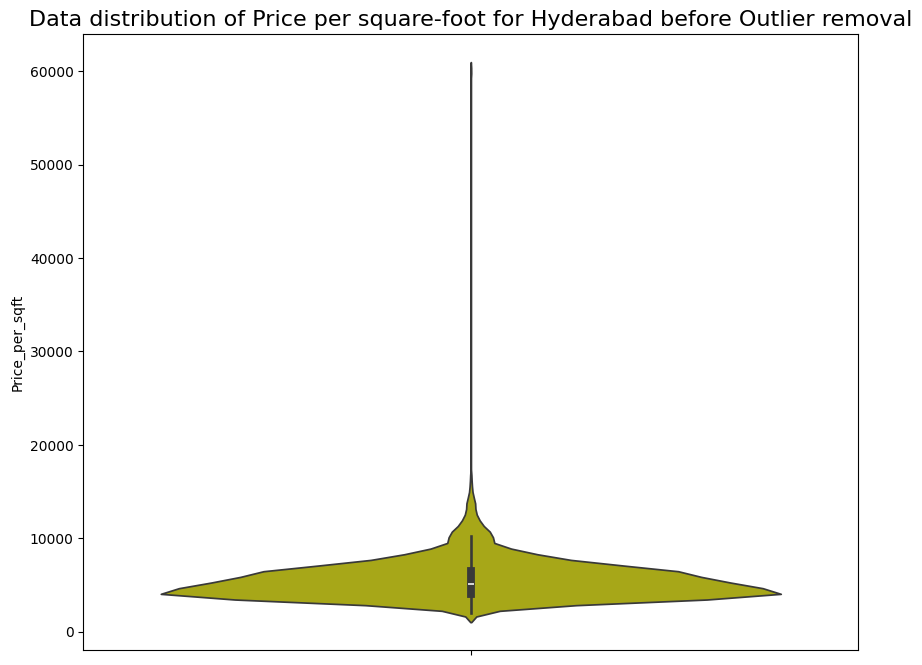

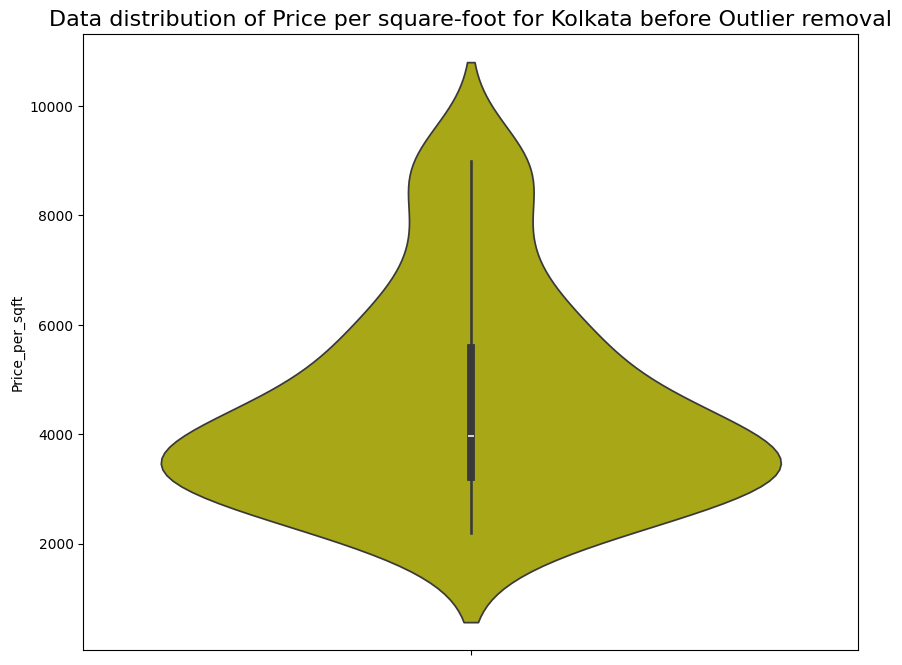

In [34]:
city = 'Mumbai', 'Delhi', 'Chennai', 'Banglore', 'Hyderabad', 'Kolkata'
for c in city:
    df1 = DF[(DF['City']==c)]
    plt.figure(figsize=(10,8))
    sns.violinplot(df1['Price_per_sqft'], color='y')
    plt.title(f'Data distribution of Price per square-foot for {c} before Outlier removal', fontsize=16)

In [35]:
def remove_city_outliers(DF):
    data_new = pd.DataFrame()
    for key, subdata in DF.groupby('City'):
        mean = np.mean(subdata.Price_per_sqft)
        std = np.std(subdata.Price_per_sqft)
        new = subdata[(subdata.Price_per_sqft>(mean-std)) & (subdata.Price_per_sqft<=(mean+std))]
        data_new = pd.concat([data_new,new], ignore_index=True)
    return data_new
Df = remove_city_outliers(DF)
Df.shape

(8042, 15)

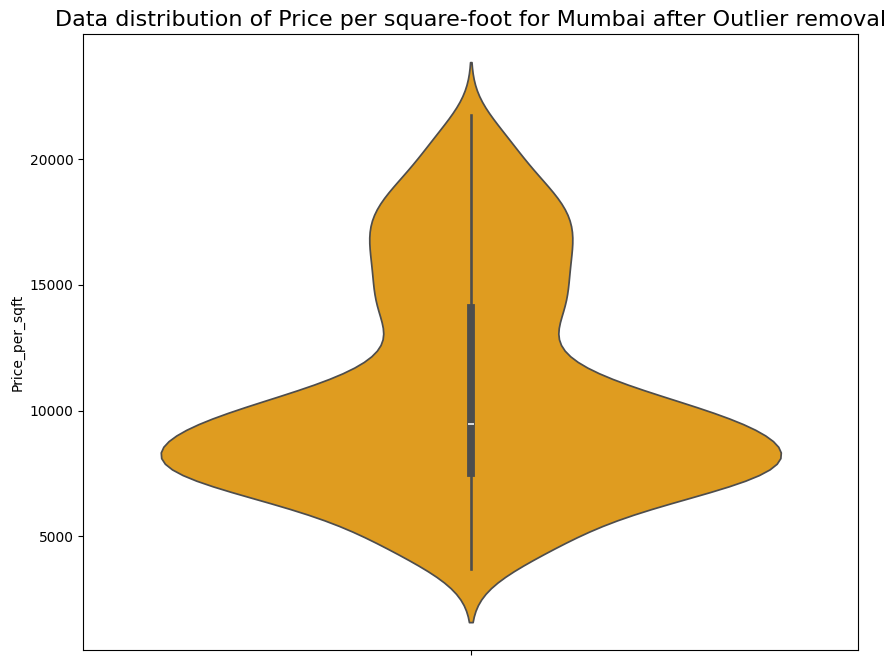

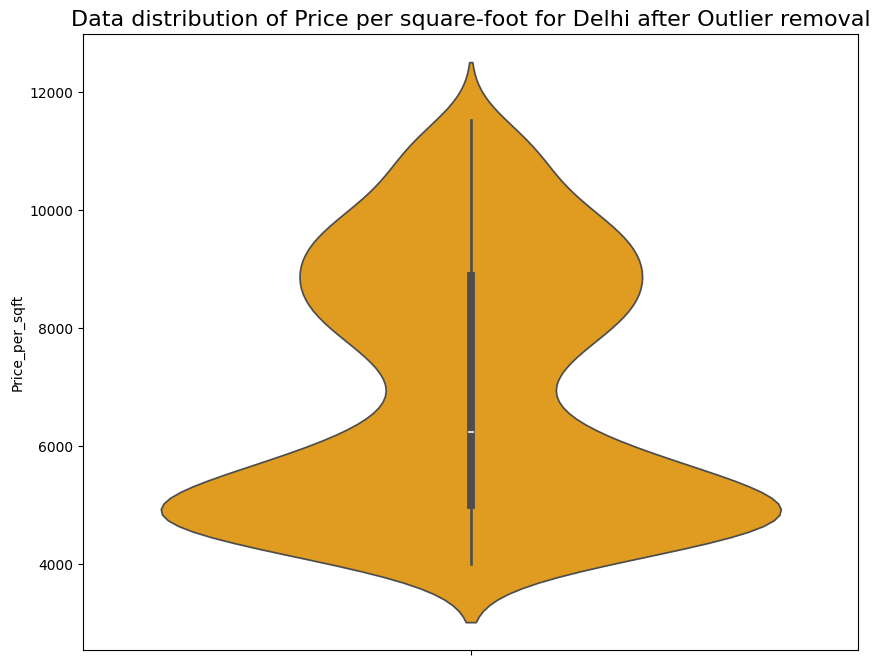

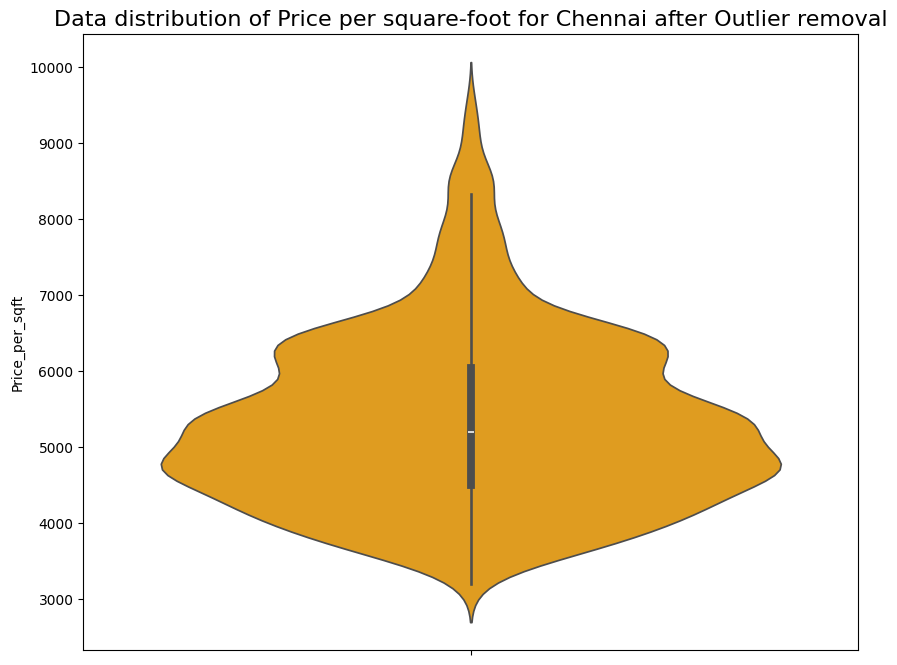

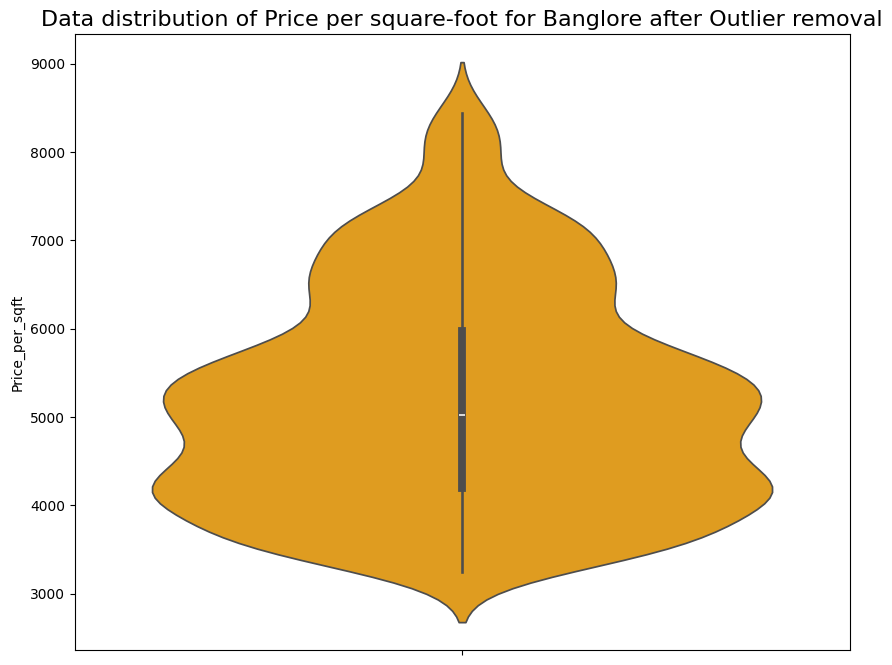

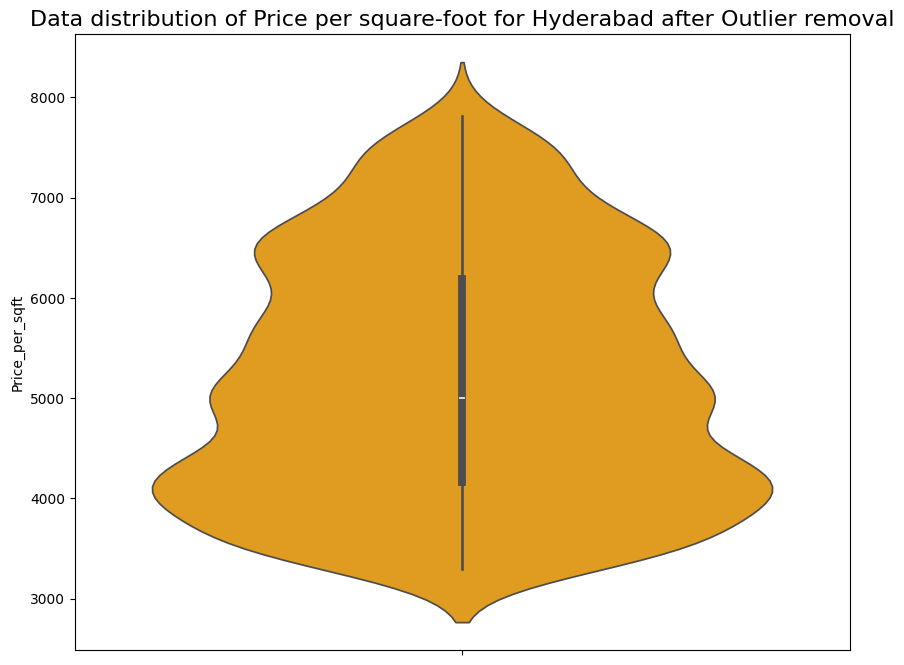

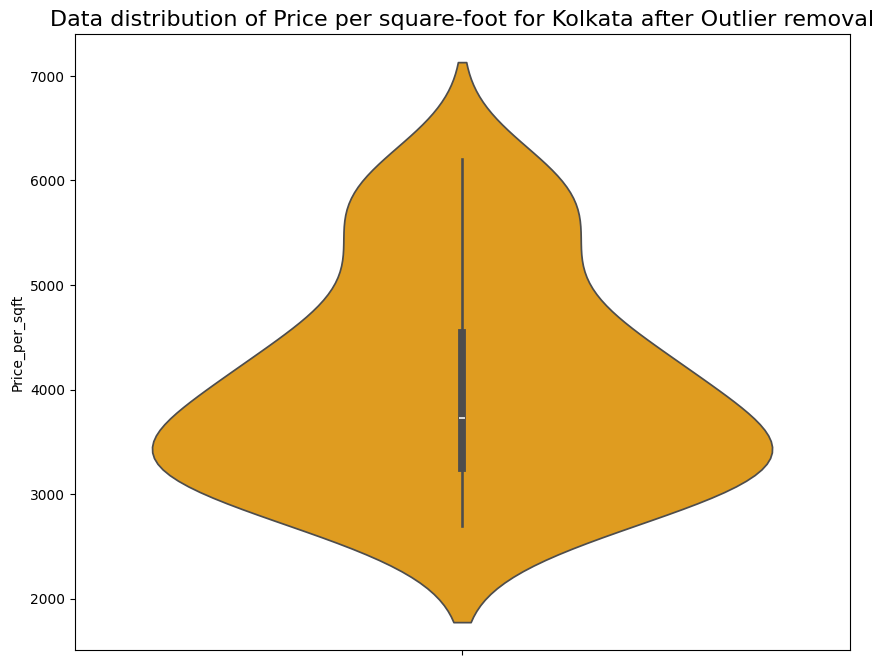

In [36]:
city = 'Mumbai', 'Delhi', 'Chennai', 'Banglore', 'Hyderabad', 'Kolkata'
for c in city:
    df1 = Df[(Df['City']==c)]
    plt.figure(figsize=(10,8))
    sns.violinplot(df1['Price_per_sqft'], color='orange')
    plt.title(f'Data distribution of Price per square-foot for {c} after Outlier removal', fontsize=16)

 # Checking All outliers

In [37]:
# Function for Checking Outliers
def outliers(x):
    y=x.select_dtypes(include=[int,float])
    for i in y:
        sns.boxplot(x=DF[i])
        plt.title(i)
        plt.show()

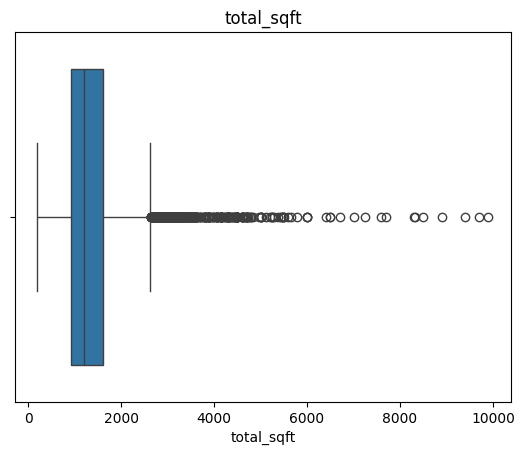

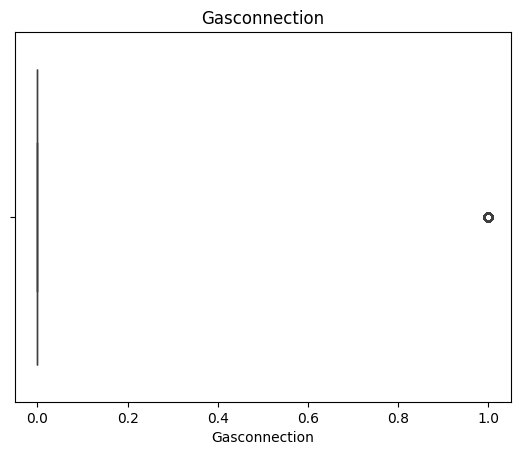

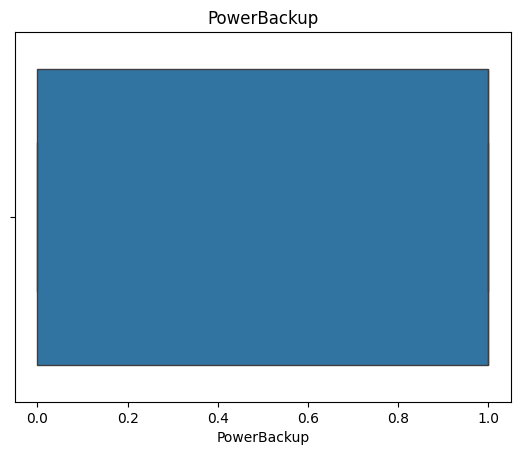

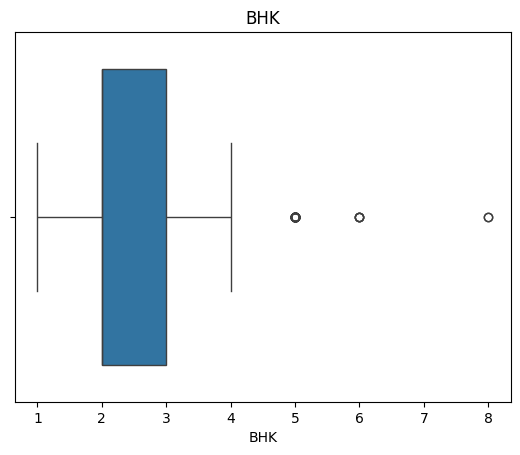

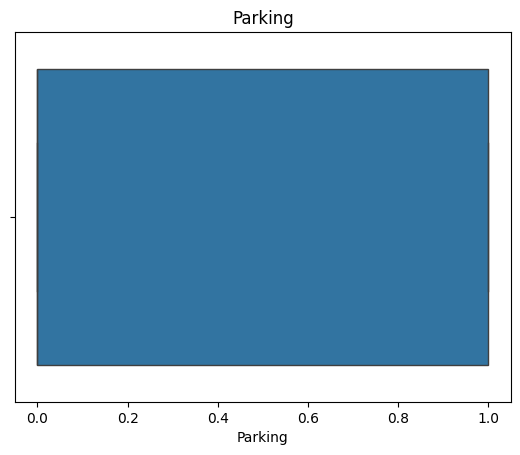

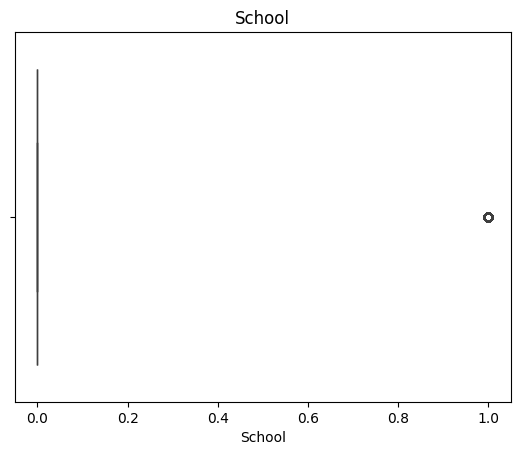

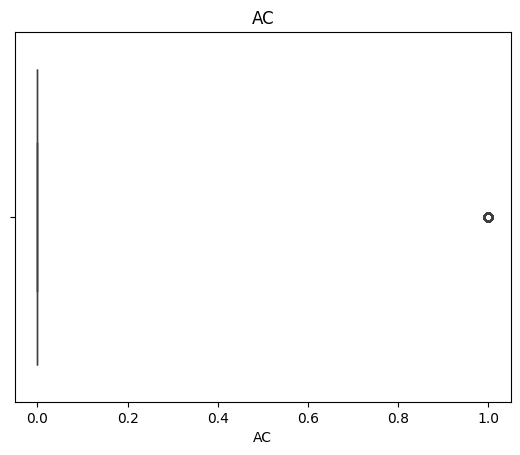

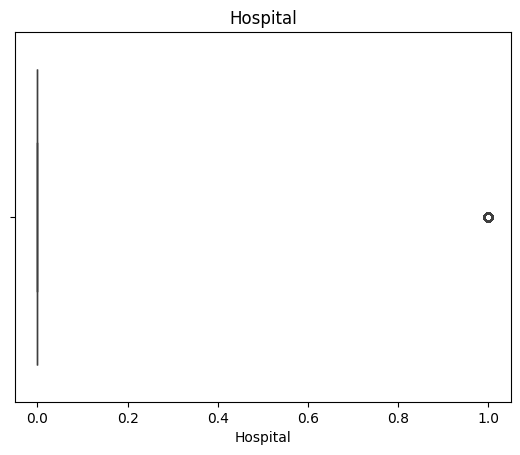

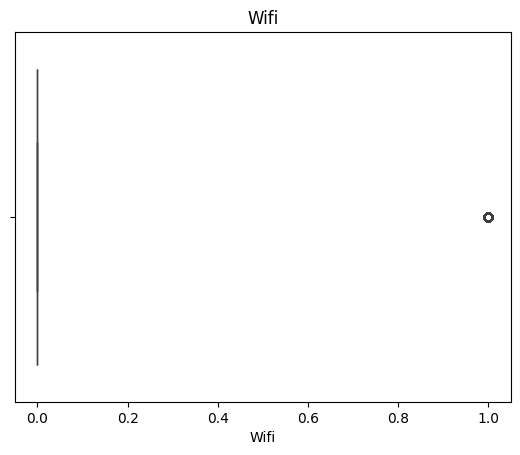

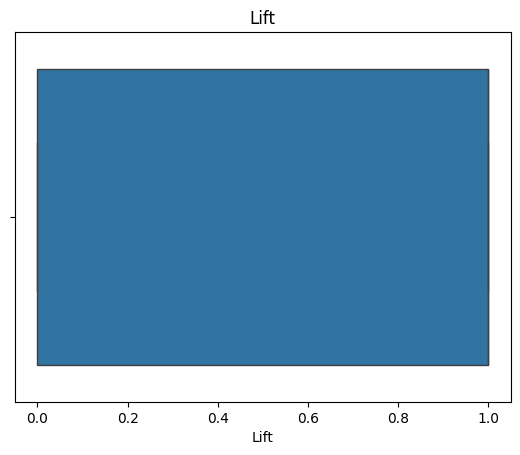

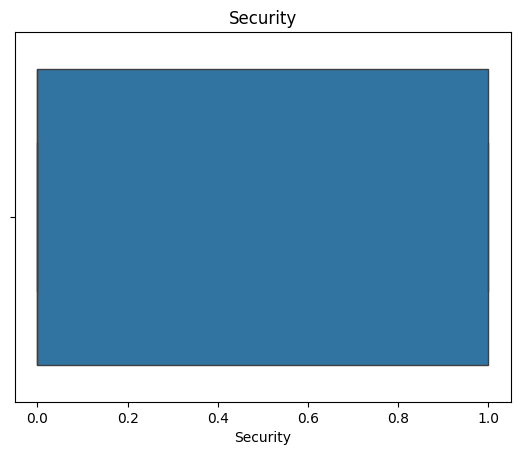

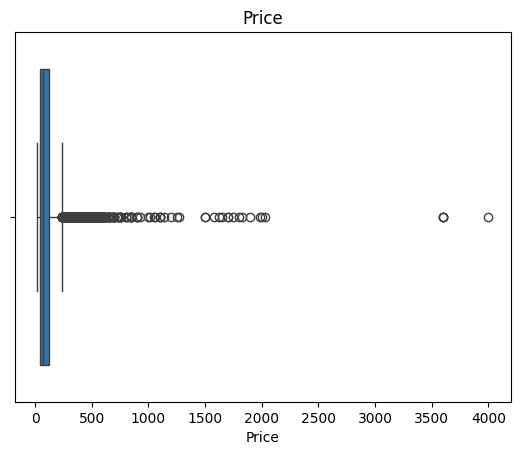

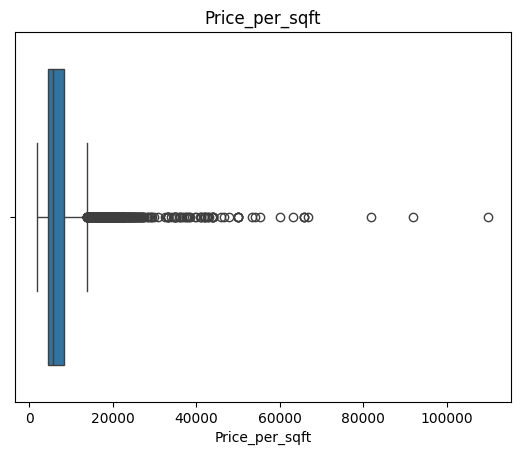

In [38]:
outliers(DF)

# Remove outliers

In [39]:
DF.columns

Index(['City', 'Area', 'total_sqft', 'Gasconnection', 'PowerBackup', 'BHK',
       'Parking', 'School', 'AC', 'Hospital', 'Wifi', 'Lift', 'Security',
       'Price', 'Price_per_sqft'],
      dtype='object')

In [40]:
def remove_outliers(DF, column):
    q1 = DF[column].quantile(0.25)
    q3 = DF[column].quantile(0.75)
    IQR = q3 - q1
    low = q1 - (1.5 * IQR)
    high = q3 + (1.5 * IQR)

    # Clip the values to the lower and upper bounds
    DF[column] = np.clip(DF[column], low, high)

In [41]:
# As these columns consisted with most outliers
remove_outliers(DF,'Price_per_sqft')
remove_outliers(DF,'Price')
remove_outliers(DF,'total_sqft')



# Modelling

In [42]:
DF1=DF.copy()

In [43]:
DF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            9390 non-null   object 
 1   Area            9390 non-null   object 
 2   total_sqft      9390 non-null   float64
 3   Gasconnection   9390 non-null   float64
 4   PowerBackup     9390 non-null   float64
 5   BHK             9390 non-null   float64
 6   Parking         9390 non-null   float64
 7   School          9390 non-null   float64
 8   AC              9390 non-null   float64
 9   Hospital        9390 non-null   float64
 10  Wifi            9390 non-null   float64
 11  Lift            9390 non-null   float64
 12  Security        9390 non-null   float64
 13  Price           9390 non-null   float64
 14  Price_per_sqft  9390 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [44]:
y=DF1["Price"]
x=DF1.drop(columns=["Price","City","Area"])

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=88)

# Defining_Models

In [46]:
models={"Linear Regression":LinearRegression(),
        "Decision Tree Regressor":DecisionTreeRegressor(),
        "Random Forest Regression":RandomForestRegressor()}

In [47]:
MSE_Results={}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    MSE=mean_squared_error(y_test,y_pred)
    MSE_Results[name]=MSE

## PRINT (MSE) RESULTS
for name,mse in MSE_Results.items():
    print(f"{name}: MSE = {mse}")

print("++++++++++++++++++++++++++++++")

Linear Regression: MSE = 203.81076944905115
Decision Tree Regressor: MSE = 52.80944641065102
Random Forest Regression: MSE = 43.051540208805235
++++++++++++++++++++++++++++++


### Results dictionary

In [48]:
from sklearn.metrics import mean_squared_error

results = {}

# Iterate through models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R-squared": r2}

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items(): 
        print(f"{metric}: {value}")
    print()

Linear Regression:
MAE: 9.286807639399173
MSE: 203.81076944905115
RMSE: 14.276230925879952
R-squared: 0.9474186198060461

Decision Tree Regressor:
MAE: 1.8293923566155592
MSE: 55.00779704088927
RMSE: 7.416724144855953
R-squared: 0.9858084737246336

Random Forest Regression:
MAE: 1.5363012581468323
MSE: 43.897245161680345
RMSE: 6.625499616004845
R-squared: 0.9886748980755381



### Convert results dictionary to DataFrame

In [49]:
results_df = pd.DataFrame.from_dict(results, orient='index')

# Print the DataFrame
print(results_df)

                               MAE         MSE       RMSE  R-squared
Linear Regression         9.286808  203.810769  14.276231   0.947419
Decision Tree Regressor   1.829392   55.007797   7.416724   0.985808
Random Forest Regression  1.536301   43.897245   6.625500   0.988675


## -> BEST MODEL

In [50]:
## BEST MODEL
BEST_model= min(MSE_Results,key=MSE_Results.get)
print("--->> BEST MODEL IS ---> > > > ",{BEST_model})

--->> BEST MODEL IS ---> > > >  {'Random Forest Regression'}
